### IMDB 영화리뷰 감성분석 - LSTM

In [2]:
from tensorflow.keras.datasets import imdb
(X_train, y_train) , (X_test, y_test) = imdb.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

17473536/17464789 [==============================] - 0s 0us/step


((25000,), (25000,), (25000,), (25000,))

In [3]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
# 리뷰 최대길이, 평균길이
max(len(s) for s in X_train) , sum(map(len, X_train)) / len(X_train)

(2494, 238.71364)

### LSTM으로 감성 분석
- 단어 빈도수 : 10,000 (총 88,584)
- 리뷰 단어수 : 500(최대 2494)
- 최대 데이터 갯수 => 나중에 해보기!
    - train : 25000, valid: 10000, test: 15000
- 수업시간 :
    - train: 20000, test: 5000(valid:20%)

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import reuters
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [6]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, GRU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [7]:
num_words = 10000
(X_train, y_train), (_, _) = imdb.load_data(num_words = 10000)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.2,
    random_state = seed
)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20000,), (5000,), (20000,), (5000,))

In [10]:
max_len = 500
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)
X_train.shape, X_test.shape

((20000, 500), (5000, 500))

In [20]:
model = Sequential([
    Embedding(num_words, 100, input_length = max_len),
    LSTM(128),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 100)          1000000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,117,377
Trainable params: 1,117,377
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile('adam', 'binary_crossentropy', ['accuracy'])

In [22]:
model_path = 'best-imdb_lstm.h5'
mc = ModelCheckpoint(model_path, verbose=1, best_save_only = True)
es = EarlyStopping(patience=5)

In [23]:
hist1 = model.fit(X_train, y_train, validation_split = 0.2,
          epochs = 100, batch_size = 64, 
          callbacks=[mc, es])

Epoch 1/100
249/250 [============================>.] - ETA: 0s - loss: 0.4459 - accuracy: 0.7878
Epoch 1: saving model to best-imdb_lstm.h5
250/250 [==============================] - 9s 33ms/step - loss: 0.4455 - accuracy: 0.7879 - val_loss: 0.3277 - val_accuracy: 0.8590
Epoch 2/100
250/250 [==============================] - ETA: 0s - loss: 0.2678 - accuracy: 0.8959
Epoch 2: saving model to best-imdb_lstm.h5
250/250 [==============================] - 8s 32ms/step - loss: 0.2678 - accuracy: 0.8959 - val_loss: 0.3170 - val_accuracy: 0.8675
Epoch 3/100
249/250 [============================>.] - ETA: 0s - loss: 0.1896 - accuracy: 0.9315
Epoch 3: saving model to best-imdb_lstm.h5
250/250 [==============================] - 8s 31ms/step - loss: 0.1897 - accuracy: 0.9314 - val_loss: 0.3342 - val_accuracy: 0.8580
Epoch 4/100
249/250 [============================>.] - ETA: 0s - loss: 0.1492 - accuracy: 0.9477
Epoch 4: saving model to best-imdb_lstm.h5
250/250 [==============================] - 8

In [24]:
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

157/157 [==============================] - 2s 11ms/step - loss: 0.5556 - accuracy: 0.8542


[0.5556423664093018, 0.854200005531311]

In [25]:
y_acc = hist1.history['accuracy']
y_loss = hist1.history['loss']
xs = np.arange(1, len(y_acc) + 1)

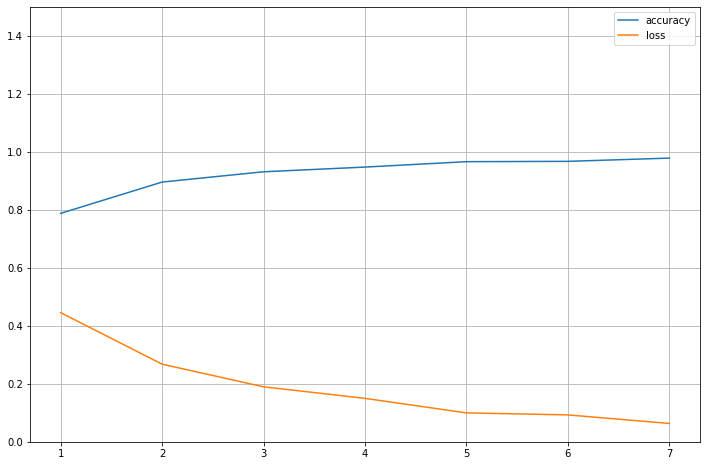

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='accuracy')
plt.plot(xs, y_loss, label='loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.5])
plt.show()